In [1]:
#this project for bank users 
#the proble ("""""""""")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [4]:
df = pd.read_csv('bank_customers.csv')

In [5]:
#understanding the data set 

In [6]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Total_Relationship_Count  \
0        Married     $60K - $80K          Blue                         5   
1         Single  Less than $40K          Blue                         6   
2        Married    $80K - $120K          Blue                         4   
3        Unknown  Less than $40K          Blue                         3   
4        Married     $60K - $80K          Blue                         5   

   Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  
0       12691.0                  777             1144              42  
1        8256.0                  864             1291              33  
2        3418.0                    0             1887              20  
3        3313.0                 2517             1171              20  
4        4716.0                    0              816              28

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Total_Trans_Amt           10127 non-null  int64  
 12  Total_Trans_Ct            10127 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.0+ MB


In [8]:
df.shape

(10127, 13)

In [9]:
df.size

131651

In [10]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

In [11]:
df.describe()

Customer_Age  Dependent_count  Total_Relationship_Count  Credit_Limit  \
count  10127.000000     10127.000000              10127.000000  10127.000000   
mean      46.325960         2.346203                  3.812580   8631.953698   
std        8.016814         1.298908                  1.554408   9088.776650   
min       26.000000         0.000000                  1.000000   1438.300000   
25%       41.000000         1.000000                  3.000000   2555.000000   
50%       46.000000         2.000000                  4.000000   4549.000000   
75%       52.000000         3.000000                  5.000000  11067.500000   
max       73.000000         5.000000                  6.000000  34516.000000   

       Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  
count         10127.000000     10127.000000    10127.000000  
mean           1162.814061      4404.086304       64.858695  
std             814.987335      3397.129254       23.472570  
min               0.000000       510.000000       10.000000  
25%             359.000000      2155.500000       45.000000  
50%            1276.000000      3899.000000       67.000000  
75%            1784.000000      4741.000000       81.000000  
max            2517.000000     18484.000000      139.000000

In [12]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [13]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [14]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [15]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [16]:
#we notice that Marital_Status and Income_Category have a unknown values 
#since the Marital_Status is unknown dosnt count as a null value we will keep it 

In [17]:
#### delete unkonwn from income category and education level

In [18]:
# dropping unknown values (null)
df.drop(df.loc[df['Income_Category']=="Unknown"].index, inplace=True) 
df.drop(df.loc[df['Education_Level']=="Unknown"].index, inplace=True) 

# display
df


Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10121  Existing Customer            56      F                1   
10122  Existing Customer            50      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Total_Relationship_Count  Credit_Limit  Total_Revolving_Bal  \
0                             5       12691.0                  777   
1                             6        8256.0                  864   
2                             4        3418.0                    0   
3                             3        3313.0                 2517   
4                             5        4716.0                    0   
...                         ...           ...                  ...   
10121                         4        3688.0                  606   
10122                         3        4003.0                 1851   
10124                         5        5409.0                    0   
10125                         4        5281.0                    0   
10126                         6       10388.0                 1961   

       Total_Trans_Amt  Total_Trans_Ct  
0                 1144              42  
1                 1291              33  
2                 1887              20  
3                 1171              20  
4                  816              28  
...                ...             ...  
10121            14596             120  
10122            15476             117  
10124            10291              60  
10125             8395              62  
10126            10294              61  

[7641 rows x 13 columns]

In [19]:
#check if unknow data deleted 
df['Income_Category'].value_counts()

Less than $40K    3005
$40K - $60K       1521
$80K - $120K      1316
$60K - $80K       1192
$120K +            607
Name: Income_Category, dtype: int64

In [20]:
#check if unknow data deleted 
df['Income_Category'].value_counts()

Less than $40K    3005
$40K - $60K       1521
$80K - $120K      1316
$60K - $80K       1192
$120K +            607
Name: Income_Category, dtype: int64

In [21]:
df['Avg_Trans_Amt'] = (df['Total_Trans_Amt'] / df['Total_Trans_Ct'])

In [22]:
df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10121  Existing Customer            56      F                1   
10122  Existing Customer            50      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Total_Relationship_Count  Credit_Limit  Total_Revolving_Bal  \
0                             5       12691.0                  777   
1                             6        8256.0                  864   
2                             4        3418.0                    0   
3                             3        3313.0                 2517   
4                             5        4716.0                    0   
...                         ...           ...                  ...   
10121                         4        3688.0                  606   
10122                         3        4003.0                 1851   
10124                         5        5409.0                    0   
10125                         4        5281.0                    0   
10126                         6       10388.0                 1961   

       Total_Trans_Amt  Total_Trans_Ct  Avg_Trans_Amt  
0                 1144              42      27.238095  
1                 1291              33      39.121212  
2                 1887              20      94.350000  
3                 1171              20      58.550000  
4                  816              28      29.142857  
...                ...             ...            ...  
10121            14596             120     121.633333  
10122            15476             117     132.273504  
10124            10291              60     171.516667  
10125             8395              62     135.403226  
10126            10294              61     168.754098  

[7641 rows x 14 columns]

<Figure size 432x288 with 0 Axes>

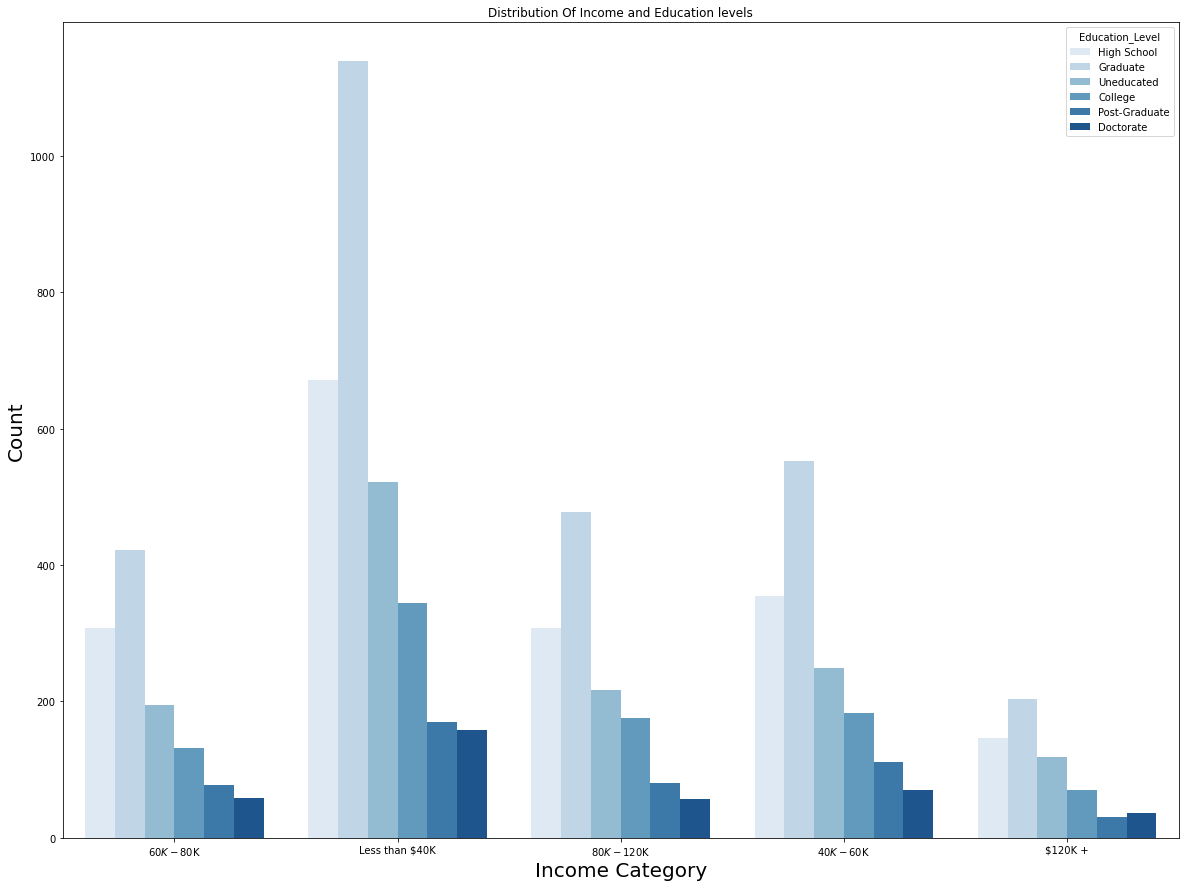

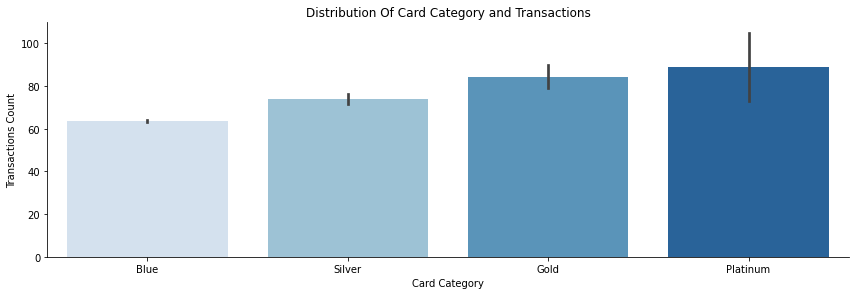

In [23]:
#f, axes = plt.subplots(2, 1)

plt.suptitle('Bank Customer Data',fontsize = 16)
plt.figure(figsize=[20,15])

#first

c1=sns.countplot(data=df, x="Income_Category", hue="Education_Level",palette="Blues")
c1.set_xlabel('Income Category',fontsize=20)
c1.set_ylabel('Count',fontsize=20)
plt.title("Distribution Of Income and Education levels");

#second

c2=sns.catplot(
data=df,x="Card_Category", y="Total_Trans_Ct",height=4, aspect=3,palette="Blues",kind="bar")
c2.set_axis_labels("Card Category", "Transactions Count",fontsize=10)
plt.title("Distribution Of Card Category and Transactions"); 




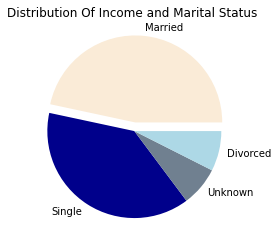

In [24]:
#third
newarray=[]
newarray.append(df['Marital_Status'].value_counts()['Married'])
newarray.append(df['Marital_Status'].value_counts()['Single'])
newarray.append(df['Marital_Status'].value_counts()['Unknown'])
newarray.append(df['Marital_Status'].value_counts()['Divorced'])
mylabels = ["Married", "Single", "Unknown", "Divorced"]
colors = ['antiquewhite', 'darkblue', 'slategrey', 'lightblue']



c3=plt.pie(newarray, labels = mylabels,colors=colors,explode = (0.1, 0, 0., 0.) )

plt.title("Distribution Of Income and Marital Status ");



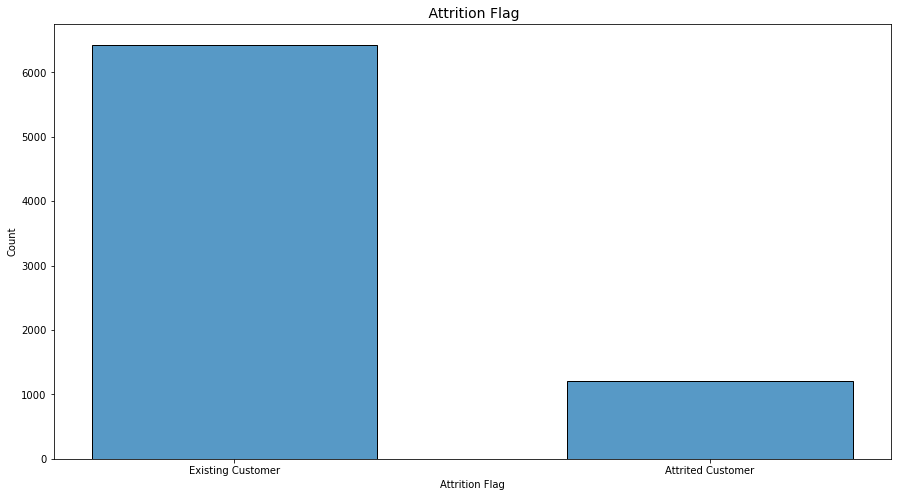

In [25]:
# fourth
plt.figure(figsize=(15,8))
sns.histplot(data=df, x="Attrition_Flag",palette="Blues",shrink=.6)
plt.title(" Attrition Flag" ,fontsize=14);
plt.xlabel('Attrition Flag');
plt.ylabel('Count');
#insight : this chart for the existing customer and attrited customer the existing customer is about 7500 
#where the arrive is 1500

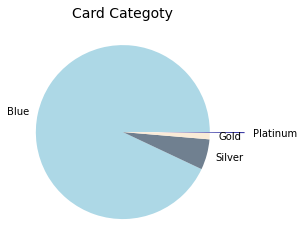

In [26]:
# fifth
colors = ['lightblue', 'slategrey','antiquewhite', 'darkblue']
plt.pie(df['Card_Category'].value_counts(),labels=['Blue','Silver','Gold', 'Platinum'],colors = colors,explode = [.0,.0,.0,.4]);
plt.title("Card Categoty",fontsize=14);
# insight : common type is 'BLUE' whish is more than 8500 and the least is platinum

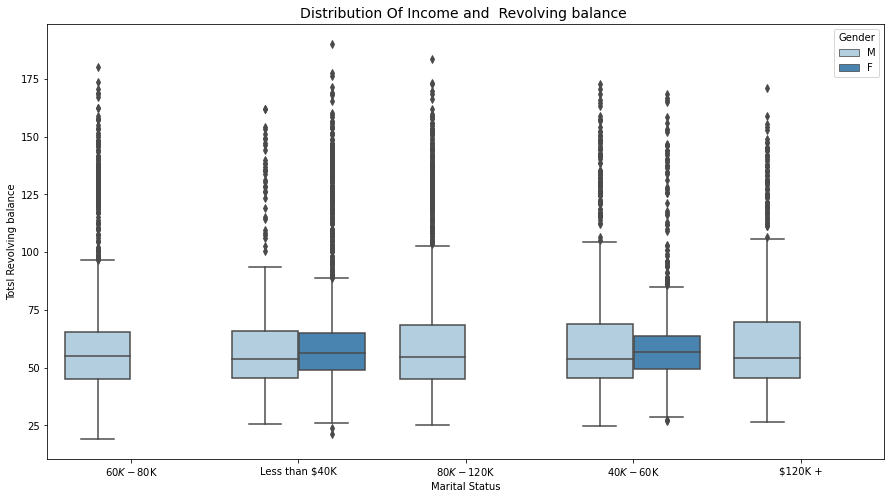

In [27]:
# sixth
plt.figure(figsize=(15,8))
sns.boxplot(x="Income_Category", y="Avg_Trans_Amt", hue='Gender', data=df,palette="Blues");
plt.xlabel('Marital Status')
plt.ylabel('Totsl Revolving balance')
plt.title("Distribution Of Income and  Revolving balance ",fontsize=14);

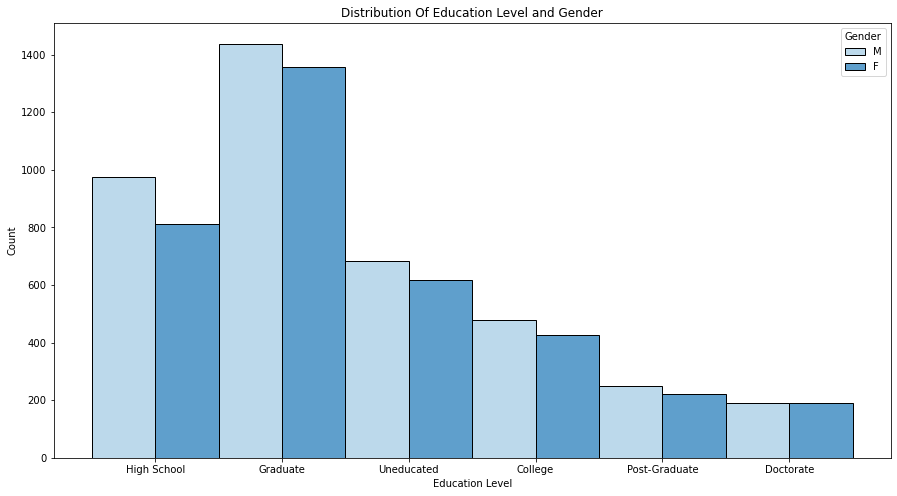

In [28]:
# seventh
plt.figure(figsize=(15,8))
sns.histplot(
    df,
    x="Education_Level",
    hue="Gender", # color of plot elements
    multiple="dodge", # also can be layer or dodge or fill
    alpha=0.8,
    palette="Blues"
)
plt.xlabel('Education Level')

plt.title("Distribution Of Education Level and Gender");


In [29]:
df.value_counts(["Gender", "Education_Level"])

Gender  Education_Level
M       Graduate           1438
F       Graduate           1358
M       High School         976
F       High School         812
M       Uneducated          684
F       Uneducated          618
M       College             478
F       College             427
M       Post-Graduate       248
F       Post-Graduate       221
M       Doctorate           191
F       Doctorate           190
dtype: int64

<Figure size 432x288 with 0 Axes>

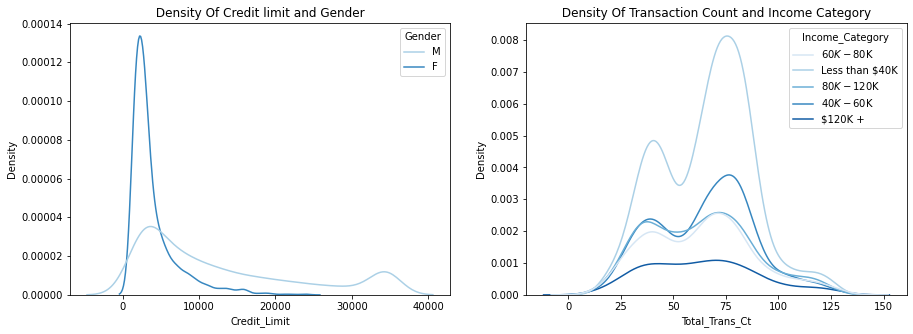

In [30]:
plt.suptitle('Bank Customer Data',fontsize = 16);
plt.figure(figsize=[15,5]);

#eighth
plt.subplot(1,2,1);
sns.kdeplot(data=df, x="Credit_Limit",hue="Gender", palette="Blues");
plt.title(" Density Of Credit limit and Gender ");

#ninth
plt.subplot(1,2,2);
sns.kdeplot(data=df, x="Total_Trans_Ct",hue="Income_Category", palette="Blues");
plt.title(" Density Of Transaction Count and Income Category ");



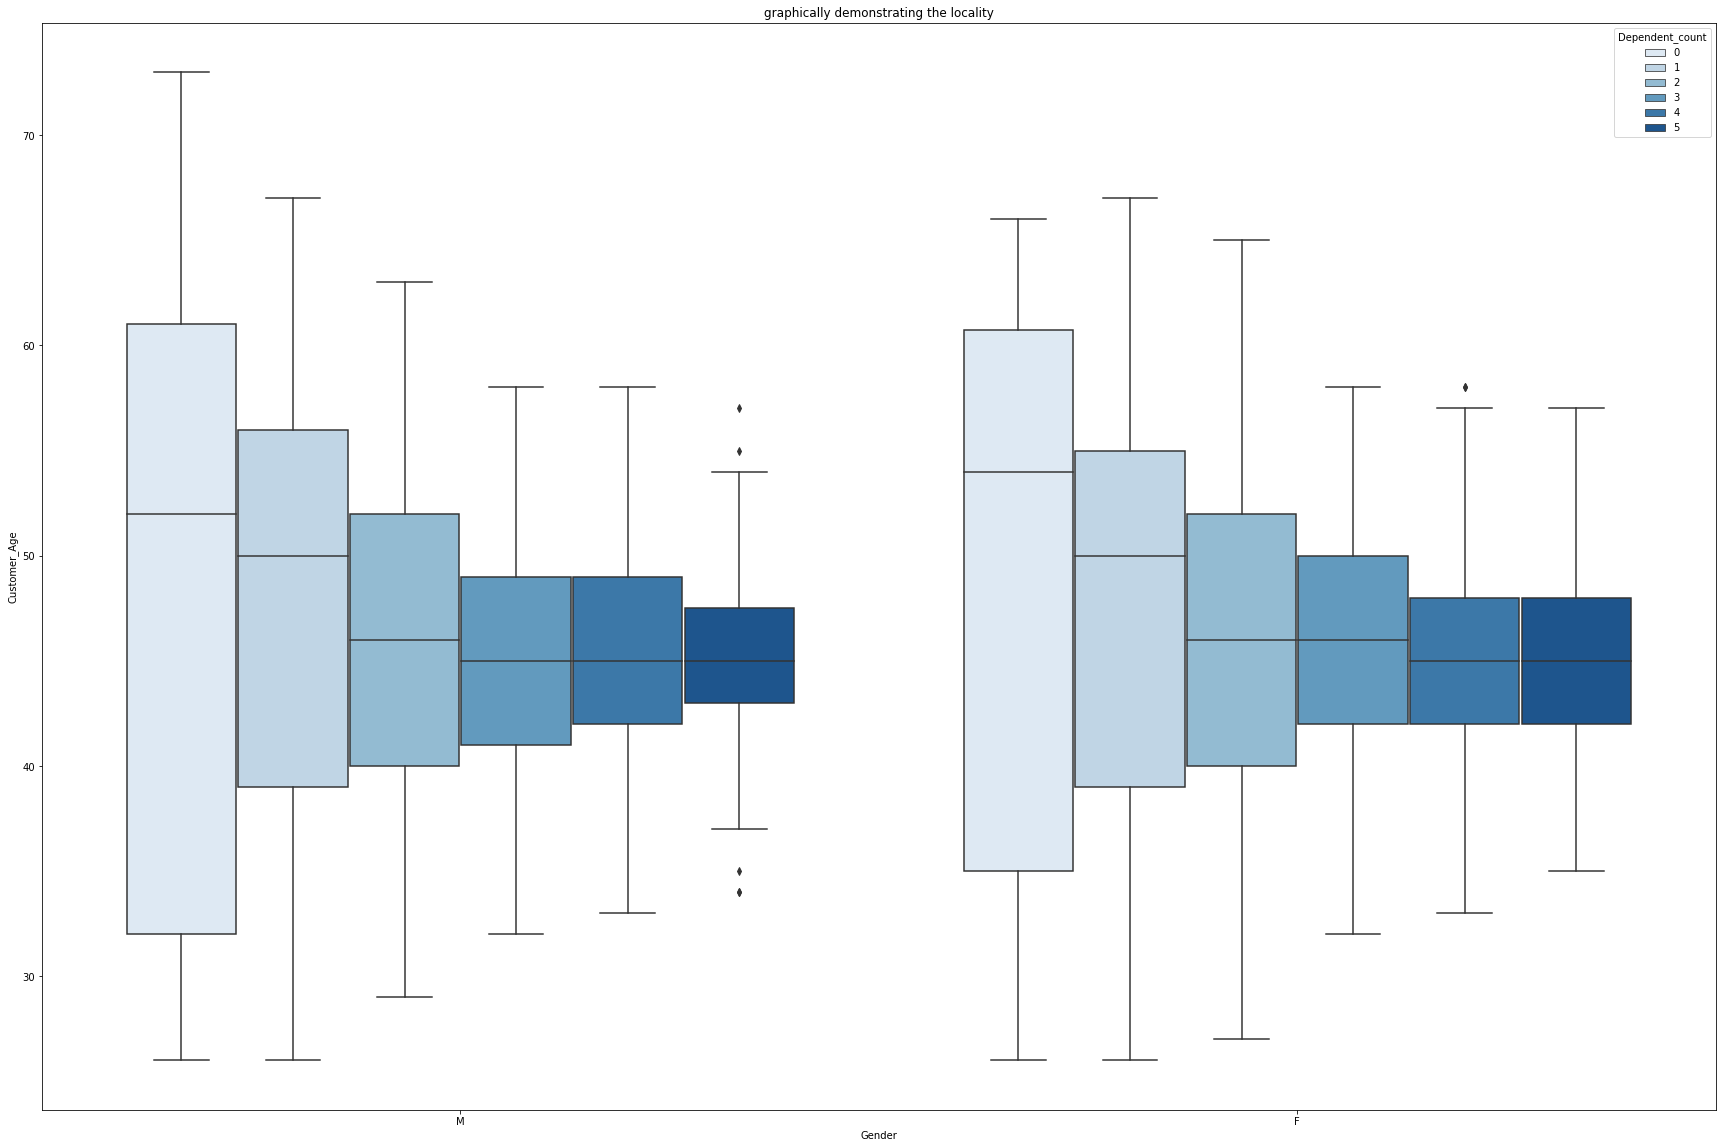

In [39]:
#ten
plt.figure(figsize=[30,20])
sns.boxplot(x='Gender', y='Customer_Age',hue='Dependent_count', data = df,palette="Blues");
plt.title("graphically demonstrating the locality");


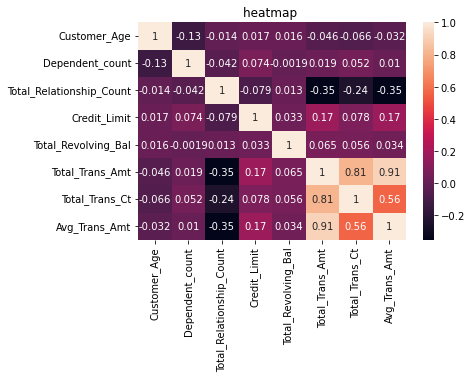

In [40]:
#elevn 
sns.heatmap(df.corr(),annot = True , data =df );
plt.title("heatmap ");

In [42]:
df['Card_Category'].value_counts()

Blue        7106
Silver       433
Gold          90
Platinum      12
Name: Card_Category, dtype: int64

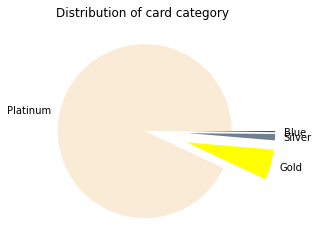

In [46]:
#twelve
newarray=[]
newarray.append(df['Card_Category'].value_counts()['Blue'])
newarray.append(df['Card_Category'].value_counts()['Silver'])
newarray.append(df['Card_Category'].value_counts()['Gold'])
newarray.append(df['Card_Category'].value_counts()['Platinum'])
mylabels = ["Platinum", "Gold", "Silver", "Blue"]
colors = ['antiquewhite', 'Yellow', 'slategrey', 'darkblue']



c3=plt.pie(newarray, labels = mylabels,colors=colors,explode = (0, 0.5, 0.5, 0.5) )

plt.title("Distribution of card category ");



In [47]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]